In [440]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode
from IPython.display import HTML
import time
import os
import math

In [ ]:
print("Hello")

In [441]:
df=pd.read_csv("C:/Users/tirth/Downloads/movies_complete.csv")

In [3]:
df_best=df[['poster_path','title','budget_musd','revenue_musd','vote_count','vote_average','popularity']]

In [5]:
df_best.isnull().sum()

poster_path       224
title               0
budget_musd     35837
revenue_musd    37306
vote_count          0
vote_average     2614
popularity          0
dtype: int64

In [6]:
df_best['return']=df_best['revenue_musd'].div(df_best['budget_musd'])
df_best['profit']=df_best['revenue_musd'].sub(df_best['budget_musd'])

C:\Users\tirth\AppData\Local\Temp\ipykernel_14868\1313716172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['return']=df_best['revenue_musd'].div(df_best['budget_musd'])
C:\Users\tirth\AppData\Local\Temp\ipykernel_14868\1313716172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['profit']=df_best['revenue_musd'].sub(df_best['budget_musd'])


In [7]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poster_path   44467 non-null  object 
 1   title         44691 non-null  object 
 2   budget_musd   8854 non-null   float64
 3   revenue_musd  7385 non-null   float64
 4   vote_count    44691 non-null  float64
 5   vote_average  42077 non-null  float64
 6   popularity    44691 non-null  float64
 7   return        5371 non-null   float64
 8   profit        5371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [9]:
df_best.isnull().sum()

poster_path       224
title               0
budget_musd     35837
revenue_musd    37306
vote_count          0
vote_average     2614
popularity          0
return          39320
profit          39320
dtype: int64

In [12]:
df_best['budget_musd'].fillna(0,inplace=True)
df_best['vote_count'].fillna(0,inplace=True)

C:\Users\tirth\AppData\Local\Temp\ipykernel_14868\248832318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['budget_musd'].fillna(0,inplace=True)
C:\Users\tirth\AppData\Local\Temp\ipykernel_14868\248832318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['vote_count'].fillna(0,inplace=True)


In [14]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   poster_path   44467 non-null  object 
 1   title         44691 non-null  object 
 2   budget_musd   44691 non-null  float64
 3   revenue_musd  7385 non-null   float64
 4   vote_count    44691 non-null  float64
 5   vote_average  42077 non-null  float64
 6   popularity    44691 non-null  float64
 7   return        5371 non-null   float64
 8   profit        5371 non-null   float64
dtypes: float64(7), object(2)
memory usage: 3.1+ MB


In [15]:
df_best.rename(columns ={'poster_path':"path", 'title':"title", 'budget_musd':'budget', 'revenue_musd':'revenue', 'vote_count':'votes',
       'vote_average':"avgrating", 'popularity':'popularity', 'profit':'profit', 'return':'roi'},inplace='True')

C:\Users\tirth\AppData\Local\Temp\ipykernel_14868\2089232101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best.rename(columns ={'poster_path':"path", 'title':"title", 'budget_musd':'budget', 'revenue_musd':'revenue', 'vote_count':'votes',


__Create a function to filter best to worst movie based on budget and votes__

In [20]:
def best_worst(n,by,ascending=False,mb=0,mv=0):
    df1=df_best.loc[(df_best['budget']>=mb)&(df_best['votes']>=0),['path','title',by]].sort_values(by=by,ascending=ascending).head(n).copy()
    return HTML(df1.to_html(escape=False))

__Movies Top 5 - Highest Revenue__

In [21]:
best_worst(n=5,by='revenue')

__Movies Top 5 - Highest Budget__

In [22]:
best_worst(n=5,by='budget')

__Movies Top 5 - Highest Profit__

In [23]:
best_worst(n=5,by='profit')

__Movies Top 5 - Lowest Profit__

In [24]:
best_worst(n=5,by='profit',ascending=True)

__Movies Top 5 - Highest ROI__

In [25]:
best_worst(n=5,by='roi',ascending=False)

__Movies Top 5 - Lowest ROI__

In [30]:
best_worst(n=5,by='roi',ascending=True,mb=100)

__Movies Top 5 - Most Votes__

In [34]:
best_worst(n=5,by='avgrating',ascending=False,mb=5)

In [37]:
best_worst(n=5,by='avgrating',ascending=True,mv=10)

__Votes__

In [38]:
best_worst(n=5,by='votes')

In [39]:
best_worst(n=5,by='votes',ascending=True,mv=10)

__Movies Top 5 - Most Popular__

In [41]:
best_worst(n=5,by='popularity',mv=10)

In [42]:
best_worst(n=5,by='popularity',mv=10,ascending=True)

## Find your next Movie

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [67]:
sci_fi=((df.genres.str.contains('Science')) & (df.genres.str.contains('Action')))
actor= (df.cast.str.contains('Uma Thurman'))

In [68]:
HTML(df.loc[(sci_fi) & (actor),['poster_path','title','vote_average','cast']].sort_values(by='vote_average',ascending=False).head(5).to_html(escape=False))

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

In [69]:
ca=df.cast.str.contains('Uma Thurman')
dic=df.director.str.contains('Quentin Tarantino')

In [71]:
HTML(df.loc[(ca) & (dic),['poster_path','title','cast','director','runtime']].sort_values(by='runtime',ascending=True).head(5).to_html(escape=False))

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

In [75]:
df['release_date']=pd.to_datetime(df['release_date'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [84]:
co=df.production_companies.str.contains('Pixar')
ran=df.release_date.between('2010-01-01','2015-12-31')

In [85]:
HTML(df.loc[(co) & (ran) ,['title','poster_path','revenue_musd','release_date']].sort_values(by='revenue_musd',ascending=False).head(5).to_html(escape=False))

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

In [92]:
gen=(df.genres.str.contains('Action')) | ((df.genres.str.contains('Action')))
rete=df['value_counts']>=7.5


In [93]:
df['original_language']

0        en
1        en
2        en
3        en
4        en
         ..
44686    fa
44687    tl
44688    en
44689    en
44690    en
Name: original_language, Length: 44691, dtype: object

In [117]:
HTML(df.loc[(df['vote_average']>=7.5) & (gen) &(df.original_language.str.contains('en')),['poster_path','title','vote_average','release_date']].sort_values(by='release_date',ascending=False).head(5).to_html(escape=False))

In [114]:
df['vote_average']<7.5

0        False
1         True
2         True
3         True
4         True
         ...  
44686     True
44687    False
44688     True
44689    False
44690    False
Name: vote_average, Length: 44691, dtype: bool

In [106]:
df1=pd.read_csv("C:/Users/tirth/Downloads/movies_complete.csv")

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [111]:
df.replace(df.drop(df['vote_count']),df1['vote_count'],inplace=True)

In [107]:
df1['vote_count']>=7.5

0         True
1         True
2         True
3         True
4         True
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: vote_count, Length: 44691, dtype: bool

In [118]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.Collecting wordcloud
                                              0.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ----------                               41.0/152.1 kB ? eta -:--:--
     ---------------------------------    143.4/152.1 kB 327.9 kB/s eta 0:00:01
     ------------------------------------ 152.1/152.1 kB 283.7 kB/s eta 0:00:00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [119]:
df

id                        title  \
0         862                    Toy Story   
1        8844                      Jumanji   
2       15602             Grumpier Old Men   
3       31357            Waiting to Exhale   
4       11862  Father of the Bride Part II   
...       ...                          ...   
44686  439050                       Subdue   
44687  111109          Century of Birthing   
44688   67758                     Betrayal   
44689  227506             Satan Triumphant   
44690  461257                     Queerama   

                                                 tagline release_date  \
0                                                    NaN   1995-10-30   
1              Roll the dice and unleash the excitement!   1995-12-15   
2      Still Yelling. Still Fighting. Still Ready for...   1995-12-22   
3      Friends are the people who let you be yourself...   1995-12-22   
4      Just When His World Is Back To Normal... He's ...   1995-02-10   
...                                                  ...          ...   
44686         Rising and falling between a man and woman          NaN   
44687                                                NaN   2011-11-17   
44688                             A deadly game of wits.   2003-08-01   
44689                                                NaN   1917-10-21   
44690                                                NaN   2017-06-09   

                         genres           belongs_to_collection  \
0       Animation|Comedy|Family            Toy Story Collection   
1      Adventure|Fantasy|Family                             NaN   
2                Romance|Comedy       Grumpy Old Men Collection   
3          Comedy|Drama|Romance                             NaN   
4                        Comedy  Father of the Bride Collection   
...                         ...                             ...   
44686              Drama|Family                             NaN   
44687                     Drama                             NaN   
44688     Action|Drama|Thriller                             NaN   
44689                       NaN                             NaN   
44690                       NaN                             NaN   

      original_language  budget_musd  revenue_musd  \
0                    en         30.0    373.554033   
1                    en         65.0    262.797249   
2                    en          NaN           NaN   
3                    en         16.0     81.452156   
4                    en          NaN     76.578911   
...                 ...          ...           ...   
44686                fa          NaN           NaN   
44687                tl          NaN           NaN   
44688                en          NaN           NaN   
44689                en          NaN           NaN   
44690                en          NaN           NaN   

                                    production_companies  ... vote_average  \
0                                Pixar Animation Studios  ...          7.7   
1      TriStar Pictures|Teitler Film|Interscope Commu...  ...          6.9   
2                            Warner Bros.|Lancaster Gate  ...          6.5   
3                 Twentieth Century Fox Film Corporation  ...          6.1   
4              Sandollar Productions|Touchstone Pictures  ...          5.7   
...                                                  ...  ...          ...   
44686                                                NaN  ...          4.0   
44687                                        Sine Olivia  ...          9.0   
44688                            American World Pictures  ...          3.8   
44689                                          Yermoliev  ...          NaN   
44690                                                NaN  ...          NaN   

       popularity  runtime                                           overview  \
0       21.946943     81.0  Led by Woody, Andy's toys live happily in his ...   
1       17.015539    104.0  

In [120]:
from wordcloud import WordCloud

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [124]:
df.tagline[2]

'Still Yelling. Still Fighting. Still Ready for Love.'

In [126]:
df.overview

0        Led by Woody, Andy's toys live happily in his ...
1        When siblings Judy and Peter discover an encha...
2        A family wedding reignites the ancient feud be...
3        Cheated on, mistreated and stepped on, the wom...
4        Just when George Banks has recovered from his ...
                               ...                        
44686          Rising and falling between a man and woman.
44687    An artist struggles to finish his work while a...
44688    When one of her hits goes wrong, a professiona...
44689    In a small town live two brothers, one a minis...
44690    50 years after decriminalisation of homosexual...
Name: overview, Length: 44691, dtype: object

In [129]:
title=df.title.dropna()
overview=df.overview.dropna()
tagline=df.tagline.dropna()

In [137]:
'  '.join(title)

'Toy Story  Jumanji  Grumpier Old Men  Waiting to Exhale  Father of the Bride Part II  Heat  Sabrina  Tom and Huck  Sudden Death  GoldenEye  The American President  Dracula: Dead and Loving It  Balto  Nixon  Cutthroat Island  Casino  Sense and Sensibility  Four Rooms  Ace Ventura: When Nature Calls  Money Train  Get Shorty  Copycat  Assassins  Powder  Leaving Las Vegas  Othello  Now and Then  Persuasion  The City of Lost Children  Shanghai Triad  Dangerous Minds  Twelve Monkeys  Wings of Courage  Babe  Carrington  Dead Man Walking  Across the Sea of Time  It Takes Two  Clueless  Cry, the Beloved Country  Richard III  Dead Presidents  Restoration  Mortal Kombat  To Die For  How To Make An American Quilt  Se7en  Pocahontas  When Night Is Falling  The Usual Suspects  Guardian Angel  Mighty Aphrodite  Lamerica  The Big Green  Georgia  Kids of the Round Table  Home for the Holidays  The Postman  The Confessional  The Indian in the Cupboard  Eye for an Eye  Mr. Holland\'s Opus  Don\'t Be a M

In [138]:
title_c='  '.join(title)
overview_c='  '.join(overview)
tagline_c='  '.join(tagline)

In [139]:
tagline_c

'Roll the dice and unleash the excitement!  Still Yelling. Still Fighting. Still Ready for Love.  Friends are the people who let you be yourself... and never let you forget it.  Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life!  A Los Angeles Crime Saga  You are cordially invited to the most surprising merger of the year.  The Original Bad Boys.  Terror goes into overtime.  No limits. No fears. No substitutes.  Why can\'t the most powerful man in the world have the one thing he wants most?  Part Dog. Part Wolf. All Hero.  Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation.  The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime!  No one stays at the top forever.  Lose your heart and come to your senses.  Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of hi

In [140]:
title_c=WordCloud(background_color='white',height=2000,width=4000,max_words=200).generate(title_c)
title_c

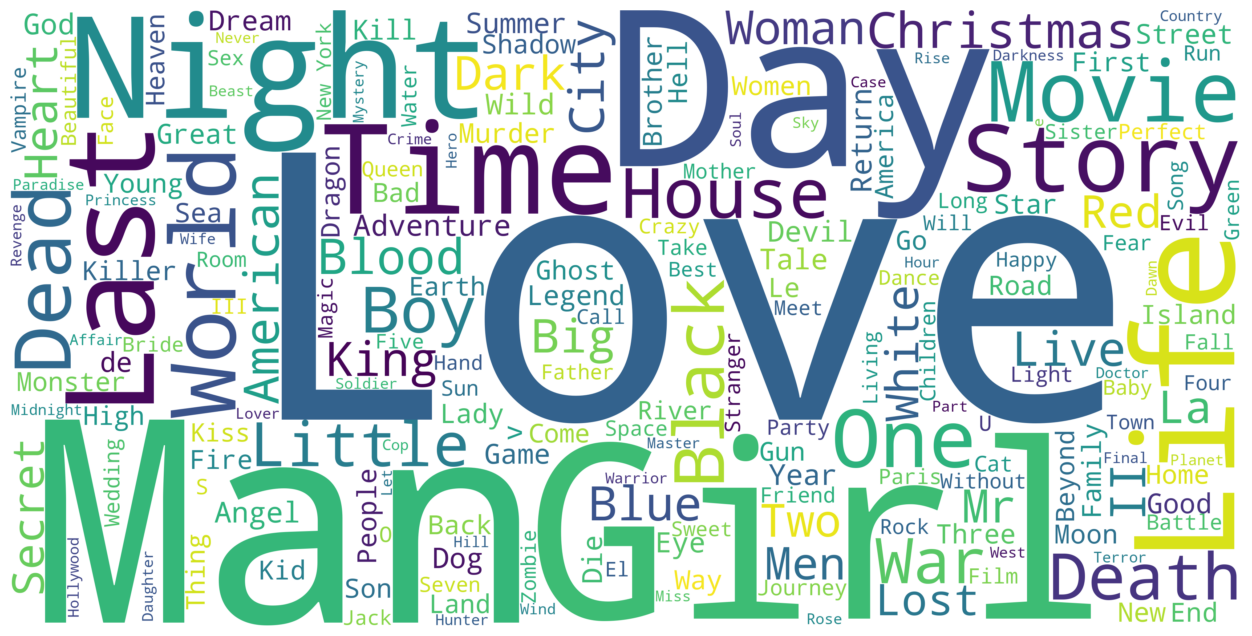

In [141]:
plt.figure(figsize=(16,8))
plt.imshow(title_c,interpolation='bilinear')
plt.axis('off')
plt.show()

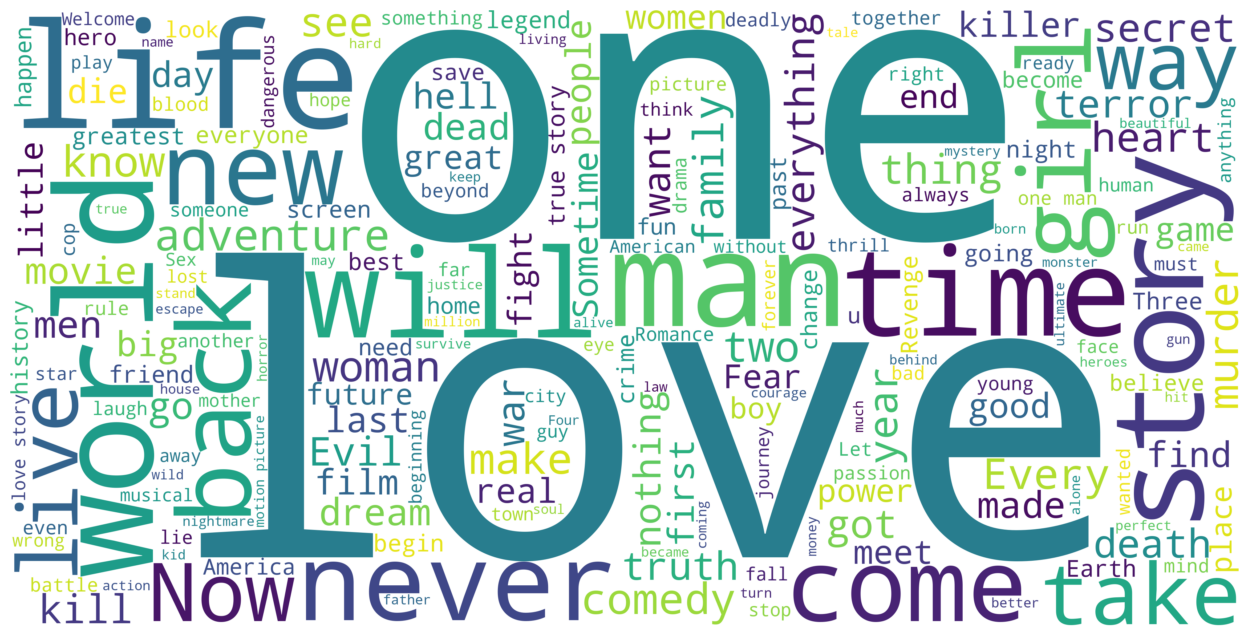

In [142]:
tagline_w=WordCloud(background_color='white',height=2000,width=4000,max_words=200).generate(tagline_c)

plt.figure(figsize=(16,8))
plt.imshow(tagline_w,interpolation='bilinear')
plt.axis('off')
plt.show()

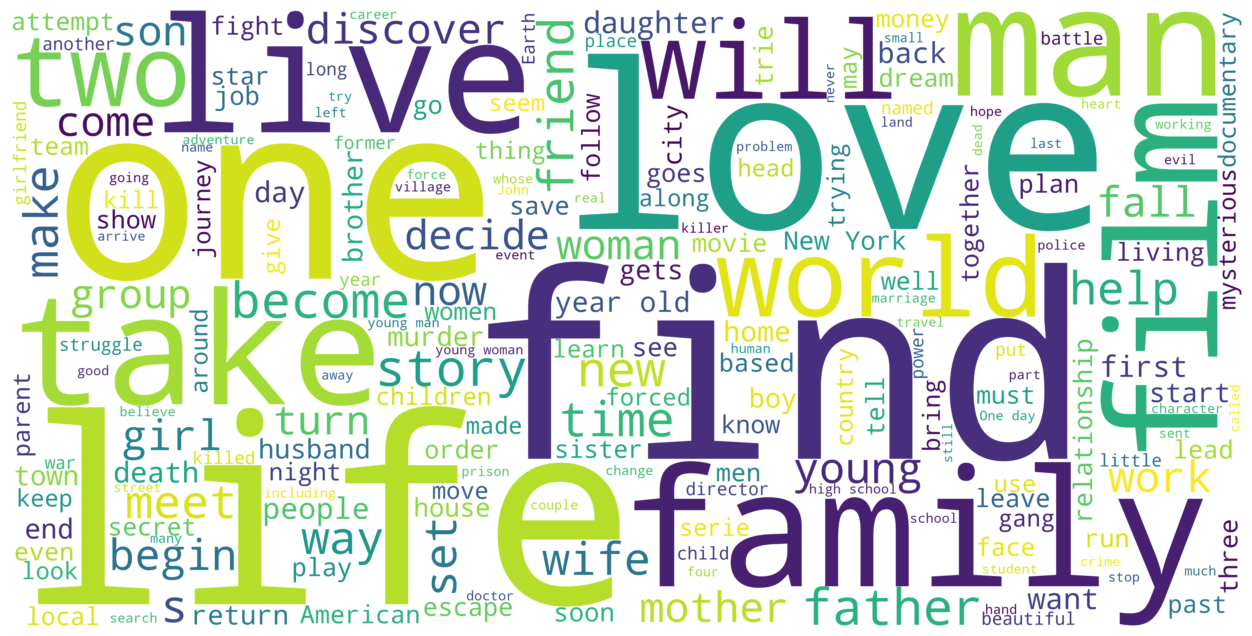

In [143]:
overview_w=WordCloud(background_color='white',height=2000,width=4000,max_words=200).generate(overview_c)

plt.figure(figsize=(16,8))
plt.imshow(overview_w,interpolation='bilinear')
plt.axis('off')
plt.show()

In [144]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [149]:
df['franc']=df.belongs_to_collection.notna()

## Are Franchises more successful?

In [151]:
df['franc'].value_counts()

franc
False    40228
True      4463
Name: count, dtype: int64

__Franchise vs. Stand-alone: Average Revenue__

In [152]:
df.groupby('franc').revenue_musd.mean()

franc
False     44.742814
True     165.708193
Name: revenue_musd, dtype: float64

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

In [155]:
df['roi']=df['revenue_musd'].div(df['budget_musd'])

In [167]:
df.groupby('franc')['roi'].median()

franc
False    1.619699
True     3.709195
Name: roi, dtype: float64

<Axes: xlabel='roi'>

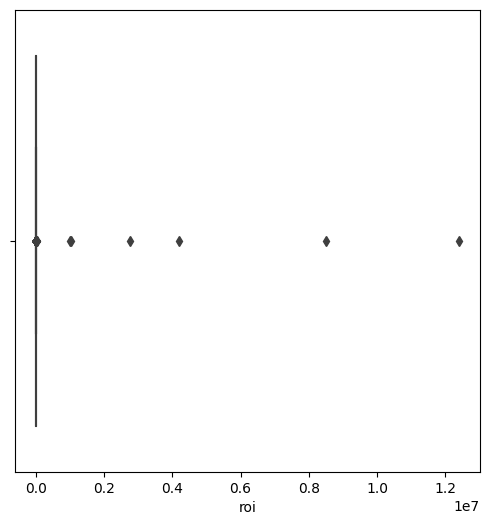

In [182]:
plt.subplots(figsize=(6, 6))
sns.boxplot(x=df['roi'])


__Franchise vs. Stand-alone: Average Budget__

In [183]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'franc', 'roi'],
      dtype='object')

In [186]:
df.groupby('franc')['budget_musd'].mean()

franc
False    18.047741
True     38.319847
Name: budget_musd, dtype: float64

__Franchise vs. Stand-alone: Average Popularity__

In [187]:
df.groupby('franc')['popularity'].mean()

franc
False    2.592726
True     6.245051
Name: popularity, dtype: float64

__Franchise vs. Stand-alone: Average Rating__

In [188]:
df.groupby('franc')['vote_average'].mean()

franc
False    6.008787
True     5.956806
Name: vote_average, dtype: float64

__aggeragate function__

In [189]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'franc', 'roi'],
      dtype='object')

In [191]:
df.groupby('franc').agg({'revenue_musd':'mean','budget_musd':'mean','roi':'median','vote_count':'mean','vote_average':'mean',
                        'popularity':'mean'})

revenue_musd  budget_musd       roi  vote_count  vote_average  \
franc                                                                  
False     44.742814    18.047741  1.619699   78.289550      6.008787   
True     165.708193    38.319847  3.709195  412.387856      5.956806   

       popularity  
franc              
False    2.592726  
True     6.245051

## Most Successful Franchises

In [193]:
df.belongs_to_collection.value_counts()

belongs_to_collection
The Bowery Boys                  29
Totò Collection                  27
Zatôichi: The Blind Swordsman    26
James Bond Collection            26
The Carry On Collection          25
                                 ..
Salt and Pepper Collection        1
Deadpool Collection               1
Ant-Man Collection                1
Elvira Collection                 1
Red Lotus Collection              1
Name: count, Length: 1691, dtype: int64

In [195]:
frc=df.groupby(df['belongs_to_collection']).agg({'title':'count','revenue_musd':['sum','mean'],'budget_musd':['sum','mean'],'roi':'median','vote_count':'mean','vote_average':'mean',
                        'popularity':'mean'})

In [198]:
frc

title revenue_musd              \
                                     count          sum        mean   
belongs_to_collection                                                 
... Has Fallen Collection                2   366.780087  183.390043   
00 Schneider Filmreihe                   1     0.000000         NaN   
08/15 Collection                         1     0.000000         NaN   
100 Girls Collection                     2     0.000000         NaN   
101 Dalmatians (Animated) Collection     2   215.880014  215.880014   
...                                    ...          ...         ...   
Сказки Чуковского                        1     0.000000         NaN   
Чебурашка и крокодил Гена                1     0.000000         NaN   
Что Творят мужчины! (Коллекция)          2     0.000000         NaN   
男はつらいよ シリーズ                              3     0.000000         NaN   
식객 시리즈                                   2     0.000000         NaN   

                                     budget_musd              roi  \
                                             sum  mean     median   
belongs_to_collection                                               
... Has Fallen Collection                  130.0  65.0   2.864804   
00 Schneider Filmreihe                       0.0   NaN        NaN   
08/15 Collection                             0.0   NaN        NaN   
100 Girls Collection                         0.0   NaN        NaN   
101 Dalmatians (Animated) Collection         4.0   4.0  53.970003   
...                                          ...   ...        ...   
Сказки Чуковского                            0.0   NaN        NaN   
Чебурашка и крокодил Гена                    0.0   NaN        NaN   
Что Творят мужчины! (Коллекция)              2.0   2.0        NaN   
男はつらいよ シリーズ                                  0.0   NaN        NaN   
식객 시리즈                                       0.0   NaN        NaN   

                                       vote_count vote_average popularity  
                                             mean         mean       mean  
belongs_to_collection                                                      
... Has Fallen Collection             2333.000000         6.00  13.008090  
00 Schneider Filmreihe                  16.000000         6.50   1.931299  
08/15 Collection                         4.000000         5.90   0.628127  
100 Girls Collection                    64.000000         5.15   3.078652  
101 Dalmatians (Animated) Collection   937.000000         6.25  13.063212  
...                                           ...          ...        ...  
Сказки Чуковского                        3.000000         3.00   0.731334  
Чебурашка и крокодил Гена                7.000000         6.70   0.881504  
Что Творят мужчины! (Коллекция)          5.500000         3.15   1.299605  
男はつらいよ シリーズ                              0.666667         7.00   0.038901  
식객 시리즈                                   3.500000         4.95   0.157245  

[1691 rows x 9 columns]

In [202]:
frc.nlargest(10,('title','count'))

title revenue_musd              \
                                       count          sum        mean   
belongs_to_collection                                                   
The Bowery Boys                           29     0.000000         NaN   
Totò Collection                           27     0.000000         NaN   
James Bond Collection                     26  7106.970239  273.345009   
Zatôichi: The Blind Swordsman             26     0.000000         NaN   
The Carry On Collection                   25     0.000000         NaN   
Charlie Chan (Sidney Toler) Collection    21     0.000000         NaN   
Pokémon Collection                        20   601.865958   66.873995   
Godzilla (Showa) Collection               16     0.000000         NaN   
Charlie Chan (Warner Oland) Collection    15     0.000000         NaN   
Dragon Ball Z (Movie) Collection          15   112.121192   56.060596   

                                       budget_musd                   roi  \
                                               sum       mean     median   
belongs_to_collection                                                      
The Bowery Boys                             0.0000        NaN        NaN   
Totò Collection                             0.0000        NaN        NaN   
James Bond Collection                    1539.6500  59.217308   6.128922   
Zatôichi: The Blind Swordsman               0.0000        NaN        NaN   
The Carry On Collection                     0.0000        NaN        NaN   
Charlie Chan (Sidney Toler) Collection      0.0000        NaN        NaN   
Pokémon Collection                        250.7204  50.144080   4.464976   
Godzilla (Showa) Collection                 2.8100   0.562000        NaN   
Charlie Chan (Warner Oland) Collection      0.0000        NaN        NaN   
Dragon Ball Z (Movie) Collection            5.0000   5.000000  12.353638   

                                         vote_count vote_average popularity  
                                               mean         mean       mean  
belongs_to_collection                                                        
The Bowery Boys                            0.724138     6.675000   0.198006  
Totò Collection                           18.037037     6.837037   1.047324  
James Bond Collection                   1284.307692     6.338462  13.453502  
Zatôichi: The Blind Swordsman             11.192308     6.403846   1.100603  
The Carry On Collection                   21.040000     6.168000   3.220430  
Charlie Chan (Sidney Toler) Collection     5.809524     6.609524   0.630996  
Pokémon Collection                        71.100000     6.055000   4.374284  
Godzilla (Showa) Collection               39.750000     5.975000   3.422842  
Charlie Chan (Warner Oland) Collection     6.866667     6.658333   0.664986  
Dragon Ball Z (Movie) Collection         133.333333     6.606667   6.183563

In [228]:
frc.nlargest(20,('revenue_musd','mean'))

title revenue_musd               \
                                    count          sum         mean   
belongs_to_collection                                                 
Avatar Collection                       1  2787.965087  2787.965087   
The Avengers Collection                 2  2924.961604  1462.480802   
Frozen Collection                       2  1274.219009  1274.219009   
Finding Nemo Collection                 2  1968.906425   984.453213   
The Hobbit Collection                   3  2935.523356   978.507785   
The Lord of the Rings Collection        3  2916.544743   972.181581   
Harry Potter Collection                 8  7707.367425   963.420928   
Star Wars Collection                    8  7434.494790   929.311849   
Despicable Me Collection                6  3691.070216   922.767554   
Pirates of the Caribbean Collection     5  4521.576826   904.315365   
The Secret Life of Pets Collection      1   875.457937   875.457937   
Transformers Collection                 5  4366.101244   873.220249   
Spider-Man Collection                   3  2496.346518   832.115506   
The Dark Knight Collection              3  2463.716216   821.238739   
Wonder Woman Collection                 1   820.580447   820.580447   
Guardians of the Galaxy Collection      2  1636.744770   818.372385   
Fantastic Beasts Collection             1   809.342332   809.342332   
Iron Man Collection                     3  2424.547547   808.182516   
The Lion King Collection                4   788.241776   788.241776   
Deadpool Collection                     1   783.112979   783.112979   

                                    budget_musd                    roi  \
                                            sum        mean     median   
belongs_to_collection                                                    
Avatar Collection                        237.00  237.000000  11.763566   
The Avengers Collection                  500.00  250.000000   5.963190   
Frozen Collection                        150.00  150.000000   8.494793   
Finding Nemo Collection                  294.00  147.000000   7.573212   
The Hobbit Collection                    750.00  250.000000   3.833600   
The Lord of the Rings Collection         266.00   88.666667  11.725157   
Harry Potter Collection                 1280.00  160.000000   6.165086   
Star Wars Collection                     854.35  106.793750   8.239637   
Despicable Me Collection                 299.00   74.750000  12.761987   
Pirates of the Caribbean Collection     1250.00  250.000000   3.453009   
The Secret Life of Pets Collection        75.00   75.000000  11.672772   
Transformers Collection                  965.00  193.000000   5.197167   
Spider-Man Collection                    597.00  199.000000   3.918832   
The Dark Knight Collection               585.00  195.000000   4.339756   
Wonder Woman Collection                  149.00  149.000000   5.507251   
Guardians of the Galaxy Collection       370.00  185.000000   4.433036   
Fantastic Beasts Collection              180.00  180.000000   4.496346   
Iron Man Collection                      540.00  180.000000   4.179816   
The Lion King Collection                  45.00   45.000000  17.516484   
Deadpool Collection                       58.00   58.000000  13.501948   

                                       vote_count vote_average  popularity  
                                             mean         mean        mean  
belongs_to_collection                                                       
Avatar Collection                    12114.000000     7.200000  185.070892  
The Avengers Collection               9454.000000     7.350000   63.633534  
Frozen Collection                     3035.000000     7.100000   16.878788  
Finding Nemo Collection               5312.500000     7.200000   19.987735  
The Hobbit Collection                 5981.333333     7.233333   25.205614  
The Lord of the Rings Collection      8253.000000     8.033333   30.272873  
Harry 

In [231]:
df.groupby('belongs_to_collection')['revenue_musd'].mean().nlargest(10)

belongs_to_collection
Avatar Collection                      2787.965087
The Avengers Collection                1462.480802
Frozen Collection                      1274.219009
Finding Nemo Collection                 984.453213
The Hobbit Collection                   978.507785
The Lord of the Rings Collection        972.181581
Harry Potter Collection                 963.420928
Star Wars Collection                    929.311849
Despicable Me Collection                922.767554
Pirates of the Caribbean Collection     904.315365
Name: revenue_musd, dtype: float64

In [224]:
df.loc[(df['belongs_to_collection']=='Harry Potter Collection',['revenue_musd'])].mean()

revenue_musd    963.420928
dtype: float64

In [226]:
frc.nlargest(10,('budget_musd','sum'))

title revenue_musd              \
                                    count          sum        mean   
belongs_to_collection                                                
James Bond Collection                  26  7106.970239  273.345009   
Harry Potter Collection                 8  7707.367425  963.420928   
Pirates of the Caribbean Collection     5  4521.576826  904.315365   
The Fast and the Furious Collection     8  5125.098793  640.637349   
X-Men Collection                        6  2808.832317  468.138720   
Transformers Collection                 5  4366.101244  873.220249   
Star Wars Collection                    8  7434.494790  929.311849   
The Hobbit Collection                   3  2935.523356  978.507785   
The Terminator Collection               5  1845.327738  369.065548   
Mission: Impossible Collection          5  2778.977995  555.795599   

                                    budget_musd                   roi  \
                                            sum        mean    median   
belongs_to_collection                                                   
James Bond Collection                   1539.65   59.217308  6.128922   
Harry Potter Collection                 1280.00  160.000000  6.165086   
Pirates of the Caribbean Collection     1250.00  250.000000  3.453009   
The Fast and the Furious Collection     1009.00  126.125000  4.942154   
X-Men Collection                         983.00  163.833333  3.023632   
Transformers Collection                  965.00  193.000000  5.197167   
Star Wars Collection                     854.35  106.793750  8.239637   
The Hobbit Collection                    750.00  250.000000  3.833600   
The Terminator Collection                661.40  132.280000  2.842603   
Mission: Impossible Collection           650.00  130.000000  4.548868   

                                      vote_count vote_average popularity  
                                            mean         mean       mean  
belongs_to_collection                                                     
James Bond Collection                1284.307692     6.338462  13.453502  
Harry Potter Collection              5983.250000     7.537500  26.253893  
Pirates of the Caribbean Collection  5016.000000     6.880000  53.972237  
The Fast and the Furious Collection  3197.000000     6.662500  10.799435  
X-Men Collection                     4593.833333     6.816667   9.707541  
Transformers Collection              3046.400000     6.140000  14.425077  
Star Wars Collection                 5430.375000     7.375000  23.410919  
The Hobbit Collection                5981.333333     7.233333  25.205614  
The Terminator Collection            3366.400000     6.540000  21.893972  
Mission: Impossible Collection       2801.000000     6.600000  16.509710

- __mean rating__

In [238]:
frc[frc[('vote_count','mean')]>=1000].nlargest(20,('vote_average','mean'))

title revenue_musd               \
                                    count          sum         mean   
belongs_to_collection                                                 
The Lord of the Rings Collection        3  2916.544743   972.181581   
The Godfather Collection                3   429.375314   143.125105   
Blade Runner Collection                 1    33.139618    33.139618   
The Man With No Name Collection         3    35.500000    11.833333   
The Dark Knight Collection              3  2463.716216   821.238739   
Guardians of the Galaxy Collection      2  1636.744770   818.372385   
Kill Bill Collection                    2   333.108461   166.554231   
Kingsman Collection                     1   414.351546   414.351546   
How to Train Your Dragon Collection     2  1104.001807   552.000904   
Harry Potter Collection                 8  7707.367425   963.420928   
Toy Story Collection                    3  1937.890605   645.963535   
Back to the Future Collection           3   957.637345   319.212448   
Trainspotting Collection                2    57.903789    28.951895   
Deadpool Collection                     1   783.112979   783.112979   
The Incredibles Collection              1   631.442092   631.442092   
Star Wars Collection                    8  7434.494790   929.311849   
The Avengers Collection                 2  2924.961604  1462.480802   
The Lego Movie Collection               2   781.111076   390.555538   
Tangled Collection                      2   591.794936   591.794936   
The Space Odyssey Series                2   109.100657    54.550329   

                                    budget_musd                    roi  \
                                            sum        mean     median   
belongs_to_collection                                                    
The Lord of the Rings Collection         266.00   88.666667  11.725157   
The Godfather Collection                  73.00   24.333333   3.657142   
Blade Runner Collection                   28.00   28.000000   1.183558   
The Man With No Name Collection            2.00    0.666667  25.000000   
The Dark Knight Collection               585.00  195.000000   4.339756   
Guardians of the Galaxy Collection       370.00  185.000000   4.433036   
Kill Bill Collection                      60.00   30.000000   5.551808   
Kingsman Collection                       81.00   81.000000   5.115451   
How to Train Your Dragon Collection      310.00  155.000000   3.600057   
Harry Potter Collection                 1280.00  160.000000   6.165086   
Toy Story Collection                     320.00  106.666667   5.526299   
Back to the Future Collection             99.00   33.000000   8.300000   
Trainspotting Collection                  22.00   11.000000   3.211738   
Deadpool Collection                       58.00   58.000000  13.501948   
The Incredibles Collection                92.00   92.000000   6.863501   
Star Wars Collection                     854.35  106.793750   8.239637   
The Avengers Collection                  500.00  250.000000   5.963190   
The Lego Movie Collection                140.00   70.000000   5.859362   
Tangled Collection                       260.00  260.000000   2.276134   
The Space Odyssey Series                  38.50   19.250000   3.992869   

                                       vote_count vote_average  popularity  
                                             mean         mean        mean  
belongs_to_collection                                                       
The Lord of the Rings Collection      8253.000000     8.033333   30.272873  
The Godfather Collection              3677.000000     7.966667   31.641307  
Blade Runner Collection               3833.000000     7.900000   96.272374  
The Man With No Name Collection       1422.666667     7.833333   14.171278  
The Dark Knight Collection            9681.000000     7.800000   57.418393  
Guardians of the Galaxy Collection    7436.000000     7.750000  119.311296  
Kill B

## Most Successful Directors

- __total number of movies__


In [239]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director', 'franc', 'roi'],
      dtype='object')

In [240]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [265]:
df.groupby(df['director']).size().reset_index().sort_values(by=0,ascending=False)

director   0
7955          John Ford  66
11156    Michael Curtiz  65
16800     Werner Herzog  54
610    Alfred Hitchcock  53
16978       Woody Allen  49
...                 ...  ..
7173         Jason Zada   1
7174       Jasper James   1
7177     Javier Aguirre   1
7178    Javier Balaguer   1
17348               진모영   1

[17349 rows x 2 columns]

In [266]:
df.director.value_counts().sort_values(ascending=False)

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Georges Méliès      49
                    ..
Allan Edwall         1
Göran du Rées        1
Danyael Sugawara     1
塩谷 直義                1
Daisy Asquith        1
Name: count, Length: 17349, dtype: int64

- __total revenue__


In [313]:
df[['revenue_musd','director']].groupby(['director']).size().sort_values(ascending=False)

director
John Ford           66
Michael Curtiz      65
Werner Herzog       54
Alfred Hitchcock    53
Woody Allen         49
                    ..
Jason Zada           1
Jasper James         1
Javier Aguirre       1
Javier Balaguer      1
진모영                  1
Length: 17349, dtype: int64

In [316]:
df.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg     9256.621422
Peter Jackson        6528.244659
Michael Bay          6437.466781
James Cameron        5900.610310
David Yates          5334.563196
Christopher Nolan    4747.408665
Robert Zemeckis      4138.233542
Tim Burton           4032.916124
Ridley Scott         3917.529240
Chris Columbus       3866.836869
Roland Emmerich      3798.402596
Ron Howard           3714.152341
J.J. Abrams          3579.215315
Gore Verbinski       3575.339236
George Lucas         3341.550893
Sam Raimi            3193.788606
Francis Lawrence     3183.341910
Clint Eastwood       3100.675162
Bill Condon          3017.298095
Joss Whedon          2963.831071
Name: revenue_musd, dtype: float64

In [320]:
df.groupby('director')['revenue_musd'].sum().sort_values(ascending=False)

director
Steven Spielberg    9256.621422
Peter Jackson       6528.244659
Michael Bay         6437.466781
James Cameron       5900.610310
David Yates         5334.563196
                       ...     
Héctor Olivera         0.000000
Hélène Fillières       0.000000
Héléna Klotz           0.000000
I. Robert Levy         0.000000
진모영                    0.000000
Name: revenue_musd, Length: 17349, dtype: float64

- __mean rating__

In [368]:
df.loc[(st) &(coo),['vote_average','director']].groupby('director').vote_average.mean().sort_values(ascending=False)

director
Orson Welles         8.0
Ridley Scott         7.9
Richard Kelly        7.7
John Landis          7.5
J.J. Abrams          7.4
Guy Hamilton         7.2
Andrew Davis         7.2
Neil Burger          7.1
Paul Verhoeven       7.1
Gábor Csupó          7.0
Richard Donner       7.0
Wolfgang Petersen    7.0
Tim Burton           6.9
Jan de Bont          6.8
Gary Trousdale       6.7
Darrell Rooney       6.7
Tony Scott           6.7
George Nolfi         6.5
Robert Zemeckis      6.4
John Singleton       6.2
Conrad Vernon        6.0
Eric Darnell         6.0
Kevin Reynolds       5.9
Doug Liman           5.9
James Wong           5.8
Jake Kasdan          5.4
Name: vote_average, dtype: float64

In [331]:
st=df.vote_count>=1000


In [369]:
coo=df.groupby('director').title.value_counts().reset_index().rename(columns={'count':'co'}).co>10

In [406]:
dc=df.groupby('director').agg({'title':'count','vote_average':'mean','vote_count':'sum'})

In [414]:
df.groupby('director')['vote_average'].mean().sort_values(ascending=False)

director
Antonis Sotiropoulos    10.0
Brian Skeet             10.0
Joel Heath              10.0
Lukas Bossuyt           10.0
Osman F. Seden          10.0
                        ... 
Yulin Kuang              NaN
Yuliya Solntseva         NaN
Zion Myers               NaN
fraser Watson            NaN
Вера Кричевская          NaN
Name: vote_average, Length: 17349, dtype: float64

In [407]:
dc

title  vote_average  vote_count
director                                            
 Dale Trevillion\t       2           4.0         4.0
 Davide Manuli           1           6.9        10.0
 E.W. Swackhamer         1           5.9         5.0
 Vitaliy Vorobyov        1           5.5         3.0
 Yeon Sang-Ho            4           6.6      1039.0
...                    ...           ...         ...
Ярополк Лапшин           1          10.0         1.0
پیمان معادی              1           6.0         2.0
塩谷 直義                    1           7.2        40.0
杰森·莫玛                    1           5.8        28.0
진모영                      1           6.0         6.0

[17349 rows x 3 columns]

In [412]:
dc[(dc['title']>10) & (dc['vote_count']>=10000)].nlargest(20,'vote_average')

title  vote_average  vote_count
director                                          
Hayao Miyazaki        14      7.700000     14700.0
Christopher Nolan     11      7.618182     67344.0
Martin Scorsese       39      7.218421     35541.0
Peter Jackson         13      7.138462     47571.0
Joel Coen             17      7.023529     18139.0
James Cameron         11      6.927273     33736.0
Stanley Kubrick       16      6.912500     18214.0
Steven Spielberg      33      6.893939     62266.0
Danny Boyle           14      6.871429     16504.0
Robert Zemeckis       19      6.794737     37666.0
Terry Gilliam         14      6.764286     10049.0
Tim Burton            21      6.733333     36922.0
Ang Lee               14      6.714286     11164.0
Antoine Fuqua         12      6.708333     15519.0
Woody Allen           49      6.691837     15512.0
Clint Eastwood        35      6.685714     24001.0
Alfred Hitchcock      53      6.639623     12772.0
Ridley Scott          24      6.604167     43083.0
Kenneth Branagh       14      6.592857     11275.0
Luc Besson            16      6.525000     19627.0

In [411]:
dc[dc['title']>10]

title  vote_average  vote_count
director                                           
Abbas Kiarostami       23      6.308696       440.0
Abel Ferrara           20      5.645000       802.0
Agnieszka Holland      14      6.721429       599.0
Agnès Varda            11      6.990909       162.0
Aki Kaurismäki         24      6.366667       614.0
...                   ...           ...         ...
Yves Simoneau          11      5.280000       168.0
Yôji Yamada            11      7.237500       191.0
Zhang Yimou            18      6.916667      3469.0
Álex de la Iglesia     15      6.293333      1071.0
Éric Rohmer            27      6.734615       362.0

[634 rows x 3 columns]

In [388]:
a=df.groupby('director').title.count().reset_index()
a[a.title>10]

director  title
51       Abbas Kiarostami     23
66           Abel Ferrara     20
197     Agnieszka Holland     14
204           Agnès Varda     11
231        Aki Kaurismäki     24
...                   ...    ...
17188       Yves Simoneau     11
17193         Yôji Yamada     11
17255         Zhang Yimou     18
17288  Álex de la Iglesia     15
17317         Éric Rohmer     27

[634 rows x 2 columns]

In [468]:
aa=df.groupby('director').title.count().reset_index()
aa[aa.title>10]


director  title
51       Abbas Kiarostami     23
66           Abel Ferrara     20
197     Agnieszka Holland     14
204           Agnès Varda     11
231        Aki Kaurismäki     24
...                   ...    ...
17188       Yves Simoneau     11
17193         Yôji Yamada     11
17255         Zhang Yimou     18
17288  Álex de la Iglesia     15
17317         Éric Rohmer     27

[634 rows x 2 columns]

In [415]:

# Create a pandas DataFrame.
import pandas as pd
technologies   = ({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000],
    'Duration':['30days','50days','35days','40days','60days','35days','55days','50days'],
    'Discount':[1000,2300,1000,1200,2500,1300,1400,1600]
                })
df = pd.DataFrame(technologies, columns=['Courses','Fee','Duration','Discount'])
print(df)


   Courses    Fee Duration  Discount
0    Spark  22000   30days      1000
1  PySpark  25000   50days      2300
2   Hadoop  23000   35days      1000
3   Python  24000   40days      1200
4   Pandas  26000   60days      2500
5   Hadoop  25000   35days      1300
6    Spark  25000   55days      1400
7   Python  22000   50days      1600


In [423]:
df.groupby('Courses')[['Fee']].mean()

Fee
Courses         
Hadoop   24000.0
Pandas   26000.0
PySpark  25000.0
Python   23000.0
Spark    23500.0

In [439]:
df.groupby(['Courses','Fee'])['Fee'].count()

Courses  Fee  
Hadoop   23000    1
         25000    1
Pandas   26000    1
PySpark  25000    1
Python   22000    1
         24000    1
Spark    22000    1
         25000    1
Name: Fee, dtype: int64

In [430]:
np.mean([22000,25000])

23500.0

In [469]:
dc

title  vote_average  vote_count
director                                            
 Dale Trevillion\t       2           4.0         4.0
 Davide Manuli           1           6.9        10.0
 E.W. Swackhamer         1           5.9         5.0
 Vitaliy Vorobyov        1           5.5         3.0
 Yeon Sang-Ho            4           6.6      1039.0
...                    ...           ...         ...
Ярополк Лапшин           1          10.0         1.0
پیمان معادی              1           6.0         2.0
塩谷 直義                    1           7.2        40.0
杰森·莫玛                    1           5.8        28.0
진모영                      1           6.0         6.0

[17349 rows x 3 columns]

In [470]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'crew_size',
       'director'],
      dtype='object')

In [471]:
dc=df.groupby('director').agg({'title':'count','vote_average':'mean','vote_count':'sum','revenue_musd':'sum'})

In [472]:
dc

title  vote_average  vote_count  revenue_musd
director                                                          
 Dale Trevillion\t       2           4.0         4.0      0.000000
 Davide Manuli           1           6.9        10.0      0.000000
 E.W. Swackhamer         1           5.9         5.0      0.000000
 Vitaliy Vorobyov        1           5.5         3.0      0.000000
 Yeon Sang-Ho            4           6.6      1039.0      2.129768
...                    ...           ...         ...           ...
Ярополк Лапшин           1          10.0         1.0      0.000000
پیمان معادی              1           6.0         2.0      0.000000
塩谷 直義                    1           7.2        40.0      0.000000
杰森·莫玛                    1           5.8        28.0      0.000000
진모영                      1           6.0         6.0      0.000000

[17349 rows x 4 columns]

In [476]:
dc.groupby('director').revenue_musd.sum().nlargest(20)

director
Steven Spielberg     9256.621422
Peter Jackson        6528.244659
Michael Bay          6437.466781
James Cameron        5900.610310
David Yates          5334.563196
Christopher Nolan    4747.408665
Robert Zemeckis      4138.233542
Tim Burton           4032.916124
Ridley Scott         3917.529240
Chris Columbus       3866.836869
Roland Emmerich      3798.402596
Ron Howard           3714.152341
J.J. Abrams          3579.215315
Gore Verbinski       3575.339236
George Lucas         3341.550893
Sam Raimi            3193.788606
Francis Lawrence     3183.341910
Clint Eastwood       3100.675162
Bill Condon          3017.298095
Joss Whedon          2963.831071
Name: revenue_musd, dtype: float64

__most sucssefull horror directors__

In [492]:
di=df.genres.str.contains('Horror') 


In [490]:
df[df.genres.str.contains('Horror')].groupby('director').revenue_musd.sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64

In [494]:
df[di].groupby('director')['revenue_musd'].sum().nlargest(20)

director
Paul W.S. Anderson     982.288069
James Wan              861.308375
Wes Craven             834.932742
Francis Lawrence       816.233738
Ridley Scott           689.004312
Marc Forster           531.865000
Steven Spielberg       500.104919
William Friedkin       466.403172
Darren Lynn Bousman    456.342667
M. Night Shyamalan     375.372060
Henry Joost            349.073570
David R. Ellis         348.742016
Adrian Lyne            346.110837
James DeMonaco         316.699354
Stephen Sommers        311.460501
Gore Verbinski         275.908490
Guillermo del Toro     261.629364
John R. Leonetti       255.273813
Fede Alvarez           254.643797
Jordan Peele           252.434250
Name: revenue_musd, dtype: float64

In [487]:
df['genres']=df['genres'].astype('str')

In [495]:
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [496]:
df.set_index('id',inplace=True)

In [497]:
df

title  \
id                                    
862                       Toy Story   
8844                        Jumanji   
15602              Grumpier Old Men   
31357             Waiting to Exhale   
11862   Father of the Bride Part II   
...                             ...   
439050                       Subdue   
111109          Century of Birthing   
67758                      Betrayal   
227506             Satan Triumphant   
461257                     Queerama   

                                                  tagline release_date  \
id                                                                       
862                                                   NaN   1995-10-30   
8844            Roll the dice and unleash the excitement!   1995-12-15   
15602   Still Yelling. Still Fighting. Still Ready for...   1995-12-22   
31357   Friends are the people who let you be yourself...   1995-12-22   
11862   Just When His World Is Back To Normal... He's ...   1995-02-10   
...                                                   ...          ...   
439050         Rising and falling between a man and woman          NaN   
111109                                                NaN   2011-11-17   
67758                              A deadly game of wits.   2003-08-01   
227506                                                NaN   1917-10-21   
461257                                                NaN   2017-06-09   

                          genres           belongs_to_collection  \
id                                                                 
862      Animation|Comedy|Family            Toy Story Collection   
8844    Adventure|Fantasy|Family                             NaN   
15602             Romance|Comedy       Grumpy Old Men Collection   
31357       Comedy|Drama|Romance                             NaN   
11862                     Comedy  Father of the Bride Collection   
...                          ...                             ...   
439050              Drama|Family                             NaN   
111109                     Drama                             NaN   
67758      Action|Drama|Thriller                             NaN   
227506                       nan                             NaN   
461257                       nan                             NaN   

       original_language  budget_musd  revenue_musd  \
id                                                    
862                   en         30.0    373.554033   
8844                  en         65.0    262.797249   
15602                 en          NaN           NaN   
31357                 en         16.0     81.452156   
11862                 en          NaN     76.578911   
...                  ...          ...           ...   
439050                fa          NaN           NaN   
111109                tl          NaN           NaN   
67758                 en          NaN           NaN   
227506                en          NaN           NaN   
461257                en          NaN           NaN   

                                     production_companies  \
id                                                          
862                               Pixar Animation Studios   
8844    TriStar Pictures|Teitler Film|Interscope Commu...   
15602                         Warner Bros.|Lancaster Gate   
31357              Twentieth Century Fox Film Corporation   
11862           Sandollar Productions|Touchstone Pictures   
...                                                   ...   
439050                                                NaN   
111109                                        Sine Olivia   
67758                             American World Pictures   
227506                                          Yermoliev   
461257                                                NaN   

            production_countries  ...  vote_average  popularity  runtime  \
id                                ...                                      
862     Unit

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, 862 to 461257
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  44691 non-null  object 
 1   tagline                20284 non-null  object 
 2   release_date           44657 non-null  object 
 3   genres                 44691 non-null  object 
 4   belongs_to_collection  4463 non-null   object 
 5   original_language      44681 non-null  object 
 6   budget_musd            8854 non-null   float64
 7   revenue_musd           7385 non-null   float64
 8   production_companies   33356 non-null  object 
 9   production_countries   38835 non-null  object 
 10  vote_count             44691 non-null  float64
 11  vote_average           42077 non-null  float64
 12  popularity             44691 non-null  float64
 13  runtime                43179 non-null  float64
 14  overview               43740 non-null  object 
 15  spok

In [506]:
act=df.cast.str.split('|',expand=True)
act

0                  1               2    \
id                                                            
862            Tom Hanks          Tim Allen     Don Rickles   
8844      Robin Williams      Jonathan Hyde   Kirsten Dunst   
15602     Walter Matthau        Jack Lemmon     Ann-Margret   
31357    Whitney Houston     Angela Bassett  Loretta Devine   
11862       Steve Martin       Diane Keaton    Martin Short   
...                  ...                ...             ...   
439050      Leila Hatami     Kourosh Tahami     Elham Korda   
111109      Angel Aquino        Perry Dizon   Hazel Orencio   
67758      Erika Eleniak       Adam Baldwin   Julie du Page   
227506  Iwan Mosschuchin  Nathalie Lissenko    Pavel Pavlov   
461257               NaN                NaN             NaN   

                              3               4                  5    \
id                                                                     
862                    Jim Varney   Wallace Shawn  John Ratzenberger   
8844               Bradley Pierce     Bonnie Hunt      Bebe Neuwirth   
15602                Sophia Loren    Daryl Hannah   Burgess Meredith   
31357                 Lela Rochon   Gregory Hines    Dennis Haysbert   
11862   Kimberly Williams-Paisley  George Newbern      Kieran Culkin   
...                           ...             ...                ...   
439050                       None            None               None   
111109                 Joel Torre   Bart Guingona      Soliman Cruz    
67758                 James Remar    Damian Chapa     Louis Mandylor   
227506          Aleksandr Chabrov     Vera Orlova               None   
461257                        NaN             NaN                NaN   

                     6                    7                      8    \
id                                                                     
862          Annie Potts          John Morris        Erik von Detten   
8844    David Alan Grier    Patricia Clarkson         Adam Hann-Byrd   
15602       Kevin Pollak                 None                   None   
31357      Michael Beach   Mykelti Williamson         Lamont Johnson   
11862            BD Wong  Peter Michael Goetz  Kate McGregor-Stewart   
...                  ...                  ...                    ...   
439050              None                 None                   None   
111109            Roeder        Angeli Bayani            Dante Perez   
67758         Tom Wright      Jeremy Lelliott       James Quattrochi   
227506              None                 None                   None   
461257               NaN                  NaN                    NaN   

                     9    ...   303   304   305   306   307   308   309   310  \
id                        ...                                                   
862       Laurie Metcalf  ...  None  None  None  None  None  None  None  None   
8844    Laura Bell Bundy  ...  None  None  None  None  None  None  None  None   
15602               None  ...  None  None  None  None  None  None  None  None   
31357      Wesley Snipes  ...  None  None  None  None  None  None  None  None   
11862         Jane Adams  ...  None  None  None  None  None  None  None  None   
...                  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
439050              None  ...  None  None  None  None  None  None  None  None   
111109   Betty Uy-Regala  ...  None  None  None  None  None  None  None  None   
67758      Jason Widener  ...  None  None  None  None  None  None  None  None   
227506              None  ...  None  None  None  None  None  None  None  None   
461257               NaN  ...  None  None  None  None  None  None  None  None   

         311   312  
id                  
862     None  None  
8844    None  None  
15602   None  None  
31357   None  None  
11862   None  None  
...      ...   ...  
439050  None  None  
111109  None  None  
67758   None  None  
227506  None  None  
461257  None  None  


In [517]:
act=act.stack().reset_index(level=1,drop=True).to_frame()

In [516]:
act

0                  1               2    \
id                                                            
862            Tom Hanks          Tim Allen     Don Rickles   
8844      Robin Williams      Jonathan Hyde   Kirsten Dunst   
15602     Walter Matthau        Jack Lemmon     Ann-Margret   
31357    Whitney Houston     Angela Bassett  Loretta Devine   
11862       Steve Martin       Diane Keaton    Martin Short   
...                  ...                ...             ...   
439050      Leila Hatami     Kourosh Tahami     Elham Korda   
111109      Angel Aquino        Perry Dizon   Hazel Orencio   
67758      Erika Eleniak       Adam Baldwin   Julie du Page   
227506  Iwan Mosschuchin  Nathalie Lissenko    Pavel Pavlov   
461257               NaN                NaN             NaN   

                              3               4                  5    \
id                                                                     
862                    Jim Varney   Wallace Shawn  John Ratzenberger   
8844               Bradley Pierce     Bonnie Hunt      Bebe Neuwirth   
15602                Sophia Loren    Daryl Hannah   Burgess Meredith   
31357                 Lela Rochon   Gregory Hines    Dennis Haysbert   
11862   Kimberly Williams-Paisley  George Newbern      Kieran Culkin   
...                           ...             ...                ...   
439050                       None            None               None   
111109                 Joel Torre   Bart Guingona      Soliman Cruz    
67758                 James Remar    Damian Chapa     Louis Mandylor   
227506          Aleksandr Chabrov     Vera Orlova               None   
461257                        NaN             NaN                NaN   

                     6                    7                      8    \
id                                                                     
862          Annie Potts          John Morris        Erik von Detten   
8844    David Alan Grier    Patricia Clarkson         Adam Hann-Byrd   
15602       Kevin Pollak                 None                   None   
31357      Michael Beach   Mykelti Williamson         Lamont Johnson   
11862            BD Wong  Peter Michael Goetz  Kate McGregor-Stewart   
...                  ...                  ...                    ...   
439050              None                 None                   None   
111109            Roeder        Angeli Bayani            Dante Perez   
67758         Tom Wright      Jeremy Lelliott       James Quattrochi   
227506              None                 None                   None   
461257               NaN                  NaN                    NaN   

                     9    ...   303   304   305   306   307   308   309   310  \
id                        ...                                                   
862       Laurie Metcalf  ...  None  None  None  None  None  None  None  None   
8844    Laura Bell Bundy  ...  None  None  None  None  None  None  None  None   
15602               None  ...  None  None  None  None  None  None  None  None   
31357      Wesley Snipes  ...  None  None  None  None  None  None  None  None   
11862         Jane Adams  ...  None  None  None  None  None  None  None  None   
...                  ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
439050              None  ...  None  None  None  None  None  None  None  None   
111109   Betty Uy-Regala  ...  None  None  None  None  None  None  None  None   
67758      Jason Widener  ...  None  None  None  None  None  None  None  None   
227506              None  ...  None  None  None  None  None  None  None  None   
461257               NaN  ...  None  None  None  None  None  None  None  None   

         311   312  
id                  
862     None  None  
8844    None  None  
15602   None  None  
31357   None  None  
11862   None  None  
...      ...   ...  
439050  None  None  
111109  None  None  
67758   None  None  
227506  None  None  
461257  None  None  


In [518]:
act

0
id                       
862             Tom Hanks
862             Tim Allen
862           Don Rickles
862            Jim Varney
862         Wallace Shawn
...                   ...
227506   Iwan Mosschuchin
227506  Nathalie Lissenko
227506       Pavel Pavlov
227506  Aleksandr Chabrov
227506        Vera Orlova

[557703 rows x 1 columns]

In [519]:
act.columns=['actors']

In [520]:
act

actors
id                       
862             Tom Hanks
862             Tim Allen
862           Don Rickles
862            Jim Varney
862         Wallace Shawn
...                   ...
227506   Iwan Mosschuchin
227506  Nathalie Lissenko
227506       Pavel Pavlov
227506  Aleksandr Chabrov
227506        Vera Orlova

[557703 rows x 1 columns]

In [542]:
# act.merge(df[['title','revenue_musd','vote_average','popularity']],how='left',left_index=True,right_index=True)
bact=act.merge(df[['title','revenue_musd','vote_average','popularity']],how='left',on='id')
cact=act.merge(df[['title','revenue_musd','vote_average','popularity']],how='left',on='id')


cact

actors                          title_x  revenue_musd_x  \
id                                                                            
2              Turo Pajala                            Ariel             NaN   
2         Susanna Haavisto                            Ariel             NaN   
2          Matti Pellonpää                            Ariel             NaN   
2             Eetu Hilkamo                            Ariel             NaN   
3          Matti Pellonpää              Shadows in Paradise             NaN   
...                    ...                              ...             ...   
469172      Vasco Sequeira  Manuel on the Island of Wonders             NaN   
469172     Armanda Bacelar  Manuel on the Island of Wonders             NaN   
469172     Rafael de Sousa  Manuel on the Island of Wonders             NaN   
469172  José Antônio Gomes  Manuel on the Island of Wonders             NaN   
469172       Isabel Branco  Manuel on the Island of Wonders             NaN   

        vote_average_x  popularity_x                          title_y  \
id                                                                      
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
3                  7.1      2.292110              Shadows in Paradise   
...                ...           ...                              ...   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   

        revenue_musd_y  vote_average_y  popularity_y  \
id                                                     
2                  NaN             7.1      3.860491   
2                  NaN             7.1      3.860491   
2                  NaN             7.1      3.860491   
2                  NaN             7.1      3.860491   
3                  NaN             7.1      2.292110   
...                ...             ...           ...   
469172             NaN             NaN      0.001097   
469172             NaN             NaN      0.001097   
469172             NaN             NaN      0.001097   
469172             NaN             NaN      0.001097   
469172             NaN             NaN      0.001097   

                                  title  revenue_musd  vote_average  \
id                                                                    
2                                 Ariel           NaN           7.1   
2                                 Ariel           NaN           7.1   
2                                 Ariel           NaN           7.1   
2                                 Ariel           NaN           7.1   
3                   Shadows in Paradise           NaN           7.1   
...                                 ...           ...           ...   
469172  Manuel on the Island of Wonders           NaN           NaN   
469172  Manuel on the Island of Wonders           NaN           NaN   
469172  Manuel on the Island of Wonders           NaN           NaN   
469172  Manuel on the Island of Wonders           NaN           NaN   
469172  Manuel on the Island of Wonders           NaN           NaN   

        popularity  
id                  
2         3.860491  
2         3.860491  
2         3.860491  
2         3.860491  
3         2.292110  
...            ...  
469172    0.001097  
469172    0.001097  
469172    0.001097  
469172    0.001097  
469172    0.001097  

[557703 rows x 13 columns]

In [528]:
act.merge(df[['title','revenue_musd','vote_average','popularity']],how='left',on='id')

actors                          title_x  revenue_musd_x  \
id                                                                            
2              Turo Pajala                            Ariel             NaN   
2         Susanna Haavisto                            Ariel             NaN   
2          Matti Pellonpää                            Ariel             NaN   
2             Eetu Hilkamo                            Ariel             NaN   
3          Matti Pellonpää              Shadows in Paradise             NaN   
...                    ...                              ...             ...   
469172      Vasco Sequeira  Manuel on the Island of Wonders             NaN   
469172     Armanda Bacelar  Manuel on the Island of Wonders             NaN   
469172     Rafael de Sousa  Manuel on the Island of Wonders             NaN   
469172  José Antônio Gomes  Manuel on the Island of Wonders             NaN   
469172       Isabel Branco  Manuel on the Island of Wonders             NaN   

        vote_average_x  popularity_x                          title_y  \
id                                                                      
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
3                  7.1      2.292110              Shadows in Paradise   
...                ...           ...                              ...   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   

        revenue_musd_y  vote_average_y  popularity_y  
id                                                    
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
3                  NaN             7.1      2.292110  
...                ...             ...           ...  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  

[557703 rows x 9 columns]

In [531]:
act

actors                          title_x  revenue_musd_x  \
id                                                                            
2              Turo Pajala                            Ariel             NaN   
2         Susanna Haavisto                            Ariel             NaN   
2          Matti Pellonpää                            Ariel             NaN   
2             Eetu Hilkamo                            Ariel             NaN   
3          Matti Pellonpää              Shadows in Paradise             NaN   
...                    ...                              ...             ...   
469172      Vasco Sequeira  Manuel on the Island of Wonders             NaN   
469172     Armanda Bacelar  Manuel on the Island of Wonders             NaN   
469172     Rafael de Sousa  Manuel on the Island of Wonders             NaN   
469172  José Antônio Gomes  Manuel on the Island of Wonders             NaN   
469172       Isabel Branco  Manuel on the Island of Wonders             NaN   

        vote_average_x  popularity_x                          title_y  \
id                                                                      
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
2                  7.1      3.860491                            Ariel   
3                  7.1      2.292110              Shadows in Paradise   
...                ...           ...                              ...   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   
469172             NaN      0.001097  Manuel on the Island of Wonders   

        revenue_musd_y  vote_average_y  popularity_y  
id                                                    
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
2                  NaN             7.1      3.860491  
3                  NaN             7.1      2.292110  
...                ...             ...           ...  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  
469172             NaN             NaN      0.001097  

[557703 rows x 9 columns]

In [535]:
act.actors.nunique()

201501

In [536]:
act.nunique()

actors            201501
title_x            39554
revenue_musd_x      6821
vote_average_x        92
popularity_x       41417
title_y            39554
revenue_musd_y      6821
vote_average_y        92
popularity_y       41417
dtype: int64

In [537]:
act.actors.unique()

array(['Turo Pajala', 'Susanna Haavisto', 'Matti Pellonpää', ...,
       'Armanda Bacelar', 'Rafael de Sousa', 'José Antônio Gomes'],
      dtype=object)

In [538]:
act.actors.value_counts().head(20)

actors
Bess Flowers          240
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     122
Michael Caine         110
Gérard Depardieu      109
John Carradine        109
Jackie Chan           108
Donald Sutherland     108
Frank Welker          107
Robert De Niro        104
Danny Trejo           101
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Christopher Walken     96
Danny Glover           95
John Hurt              93
Susan Sarandon         92
Dennis Hopper          92
Name: count, dtype: int64

In [541]:
act.columns

Index(['actors', 'title_x', 'revenue_musd_x', 'vote_average_x', 'popularity_x',
       'title_y', 'revenue_musd_y', 'vote_average_y', 'popularity_y'],
      dtype='object')

In [557]:
ag=act.groupby('actors').agg(Total_revenue=('revenue_musd_x','sum'),
                             mean_revenue=('revenue_musd_x','mean'),
                             mean_rating=('vote_average_x','mean'),
                             mean_pop=('popularity_x','mean'),
                             toal_movies=('actors','count'))

In [558]:
ag

Total_revenue  mean_revenue  mean_rating  mean_pop  \
actors                                                                      
\tCheung Chi-Sing           0.000000           NaN       5.9000  3.048450   
\tDouglas Hegdahl           0.000000           NaN       4.0000  0.150250   
\tRobert Osth               0.000000           NaN       6.0000  1.811797   
\tYip Chun                  0.000000           NaN       6.7500  1.795044   
  Jorge de los Reyes        0.000000           NaN       8.1000  3.471168   
...                              ...           ...          ...       ...   
长泽雅美                        0.346485      0.346485       6.4000  2.823511   
陳美貞                        83.061158     83.061158       7.0000  6.493765   
高桥一生                      333.108461    166.554231       6.7375  9.098820   
강계열                         0.000000           NaN       6.0000  0.444564   
조병만                         0.000000           NaN       6.0000  0.444564   

                       toal_movies  
actors                              
\tCheung Chi-Sing                1  
\tDouglas Hegdahl                1  
\tRobert Osth                    1  
\tYip Chun                       2  
  Jorge de los Reyes             1  
...                            ...  
长泽雅美                            11  
陳美貞                              1  
高桥一生                             8  
강계열                              1  
조병만                              1  

[201501 rows x 5 columns]

In [559]:
ag.nlargest(10,'toal_movies')

Total_revenue  mean_revenue  mean_rating   mean_pop  \
actors                                                                   
Bess Flowers          368.913259     14.756530     6.184186   2.030528   
Christopher Lee      9417.047887    324.725789     5.910204   4.749606   
John Wayne            236.094000     11.242571     5.712097   3.092939   
Samuel L. Jackson   17109.620672    213.870258     6.266116  11.703945   
Michael Caine        8053.404838    191.747734     6.269444   8.265272   
Gérard Depardieu     1247.608953     95.969919     6.053211   3.703836   
John Carradine        255.839586     19.679968     5.546667   2.434950   
Donald Sutherland    5390.766679    138.224787     6.233962   7.003230   
Jackie Chan          4699.185933    146.849560     6.275701   5.862638   
Frank Welker        13044.152470    326.103812     6.310377   9.571404   

                   toal_movies  
actors                          
Bess Flowers               240  
Christopher Lee            148  
John Wayne                 125  
Samuel L. Jackson          122  
Michael Caine              110  
Gérard Depardieu           109  
John Carradine             109  
Donald Sutherland          108  
Jackie Chan                108  
Frank Welker               107

In [560]:
ag.nlargest(10,'Total_revenue')

Total_revenue  mean_revenue  mean_rating   mean_pop  \
actors                                                                   
Stan Lee            19414.957555    647.165252     6.513043  29.936175   
Samuel L. Jackson   17109.620672    213.870258     6.266116  11.703945   
Warwick Davis       13256.032188    662.801609     6.294118  13.088614   
Frank Welker        13044.152470    326.103812     6.310377   9.571404   
John Ratzenberger   12596.126073    449.861645     6.484444  10.959477   
Jess Harnell        12234.608163    611.730408     6.435294  10.919015   
Hugo Weaving        11027.578473    459.482436     6.473684  10.967890   
Ian McKellen        11015.592318    478.938796     6.353488  15.447180   
Johnny Depp         10653.760641    217.423687     6.440580  12.378196   
Alan Rickman        10612.625348    353.754178     6.715556  10.399285   

                   toal_movies  
actors                          
Stan Lee                    48  
Samuel L. Jackson          122  
Warwick Davis               34  
Frank Welker               107  
John Ratzenberger           46  
Jess Harnell                35  
Hugo Weaving                40  
Ian McKellen                44  
Johnny Depp                 69  
Alan Rickman                45

In [561]:
ag['mean_revenue'].nlargest(10)

actors
April Marie Thomas    2787.965087
Ashley Jeffery        2787.965087
Austin Wilson         2787.965087
Brandon Jelkes        2787.965087
Bravita A. Threatt    2787.965087
Carvon Futrell        2787.965087
Chris Mala            2787.965087
Christa Oliver        2787.965087
Christopher Nolen     2787.965087
Colin Bleasdale       2787.965087
Name: mean_revenue, dtype: float64

In [562]:
act[act.actors=='Ashley Jeffery']

actors title_x  revenue_musd_x  vote_average_x  popularity_x  \
id                                                                            
19995  Ashley Jeffery  Avatar     2787.965087             7.2    185.070892   

      title_y  revenue_musd_y  vote_average_y  popularity_y  
id                                                           
19995  Avatar     2787.965087             7.2    185.070892

In [569]:
(act[act.actors=='Christian Bale'])['actors'].count()

42

In [572]:
ag[ag.toal_movies>=10].nlargest(10,'mean_revenue')

Total_revenue  mean_revenue  mean_rating   mean_pop  \
actors                                                                  
Gloria Stuart       1845.034188   1845.034188     6.368750   3.477432   
Keith Richards      2967.713802    989.237934     6.463636   5.032988   
Zoë Wanamaker        976.475550    976.475550     6.330000   6.819019   
James Cameron       1862.075059    931.037530     7.063636   4.691718   
Matthew Lewis       7915.312500    879.479167     7.372727  23.097479   
Luke de Woolfson    1720.671036    860.335518     5.718182   8.767206   
Yuri Lowenthal      1708.162716    854.081358     6.188235  19.884649   
Dominic Monaghan    3289.607607    822.401902     6.045455  10.621675   
Philip Ng            821.708551    821.708551     5.920000   6.353320   
Peter Mayhew        4820.721631    803.453605     6.700000  12.303552   

                  toal_movies  
actors                         
Gloria Stuart              18  
Keith Richards             23  
Zoë Wanamaker              10  
James Cameron              12  
Matthew Lewis              11  
Luke de Woolfson           11  
Yuri Lowenthal             17  
Dominic Monaghan           11  
Philip Ng                  10  
Peter Mayhew               11

In [574]:
ag[ag.toal_movies>=10].nlargest(10,'mean_rating')

Total_revenue  mean_revenue  mean_rating   mean_pop  \
actors                                                                    
Masao Hayama             0.000000           NaN     8.840000   0.319471   
David Attenborough       0.000000           NaN     8.270000   2.147383   
Emil Jannings            0.000000           NaN     7.780000   1.700761   
Halit Akçatepe           0.214600      0.214600     7.780000   0.741727   
Yo Oizumi              511.210189    102.242038     7.723077   7.512642   
Şener Şen               11.074013      3.691338     7.693333   0.912165   
Ayşen Gruda              0.912800      0.456400     7.677778   0.743196   
Akira Tani               0.327081      0.163541     7.654545   5.041536   
Joseph Oliveira       3543.443905    354.344391     7.640000  34.449774   
Björk                   51.332532     25.666266     7.620000   2.362645   

                    toal_movies  
actors                           
Masao Hayama                 10  
David Attenborough           11  
Emil Jannings                10  
Halit Akçatepe               10  
Yo Oizumi                    13  
Şener Şen                    16  
Ayşen Gruda                  10  
Akira Tani                   12  
Joseph Oliveira              10  
Björk                        10

In [575]:
ag[ag.toal_movies>=10].nlargest(10,'mean_pop')

Total_revenue  mean_revenue  mean_rating   mean_pop  \
actors                                                                 
Katy Mixon         1519.572457    151.957246     5.841667  51.974337   
Terry Notary       6947.211370    694.721137     6.472727  51.575849   
Goran D. Kleut     2568.942448    366.991778     6.000000  42.322667   
Mark Smith         2195.523957    243.947106     6.545455  40.076962   
Jon Hamm           3449.345393    191.630300     6.328000  39.417351   
Gal Gadot          5449.532840    495.412076     6.327273  37.385856   
Ava Acres          6272.358330    482.489102     5.985714  36.260864   
Emma Watson        9639.203121    535.511284     6.768421  35.965301   
Joseph Oliveira    3543.443905    354.344391     7.640000  34.449774   
Keith Jardine      1062.491947    212.498389     5.963636  32.003903   

                 toal_movies  
actors                        
Katy Mixon                12  
Terry Notary              11  
Goran D. Kleut            10  
Mark Smith                11  
Jon Hamm                  25  
Gal Gadot                 11  
Ava Acres                 21  
Emma Watson               19  
Joseph Oliveira           10  
Keith Jardine             11

In [579]:
df.groupby('genres')['popularity'].size().nlargest(20)

genres
Drama                   4935
Comedy                  3581
Documentary             2670
nan                     2105
Drama|Romance           1291
Comedy|Drama            1125
Horror                   962
Comedy|Romance           921
Comedy|Drama|Romance     591
Drama|Comedy             528
Horror|Thriller          527
Drama|Thriller           492
Thriller                 458
Crime|Drama              429
Romance|Drama            335
Western                  316
Action|Thriller          300
Action                   276
Drama|Foreign            274
Drama|History            266
Name: popularity, dtype: int64

In [607]:
aa=df.groupby(['genres','popularity']).size().reset_index()
len(aa[aa.genres=='Action'])

274

In [591]:
df.genres.nunique()

4045

In [586]:
df['popularity']

id
862       21.946943
8844      17.015539
15602     11.712900
31357      3.859495
11862      8.387519
            ...    
439050     0.072051
111109     0.178241
67758      0.903007
227506     0.003503
461257     0.163015
Name: popularity, Length: 44691, dtype: float64